# Proyek Analisis Data: Bike Sharing Dataset
- Nama: reski nopriandi
- Email: reskinopriandi@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 = pada musim apa penyewaan paling banyak dilakukan
- pertanyaan 2 = pada jam berapa paling banyak dilakukan penyewaan

## Menyaipkan semua library yang dibuthkan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
day_df = pd.read_csv("data\day.csv")
#print(day_df)
hour_df = pd.read_csv("data\hour.csv")
print(hour_df)
print(hour_df.info())

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1              

### Assessing Data

In [15]:
#periksa day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

"""Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant(int): record index
	- dteday(datetime) : date
	- season(int) : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr (int): year (0: 2011, 1:2012)
	- mnth (int): month ( 1 to 12)
	- hr (int): hour (0 to 23)
	- holiday (int): weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday (int): day of the week
	- workingday (int): if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit (int): 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp (float): Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp (float): Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum (float): Normalized humidity. The values are divided to 100 (max)
	- windspeed (float): Normalized wind speed. The values are divided to 67 (max)
	- casual (int): count of casual users
	- registered (int): count of registered users
	- cnt (int): count of total rental bikes including both casual and registered"""


	###perlu perubahan pada kolom dteday dari tipe data objek menjadi datetime
	###perlu merubah tipe data pada kolom season dari tipe data objek menjadi integer
	

In [7]:
###periksa missing value day_df
print(day_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


terdapat missing value karena tipe data dari kolom season adalah objek. perlu dirubah menjadi int

In [8]:
###periksa duplikasi day_df
print("jumlah duplikasi : " + str(day_df.duplicated().sum()))

jumlah duplikasi : 0


tidak terdapat duplikasi pada day_df

In [9]:
#cek parameter statistik
print(day_df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [10]:
######periksa hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


tidak ada yang perlu di perbaiki tipe data dari hour_df

In [11]:
###periksa missing value hour_df
print(hour_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


tidak terdapat missing value dari data hour_df

In [12]:
####periksa duplikasi hour_df
print("jumlah duplikasi : " + str(hour_df.duplicated().sum()))

jumlah duplikasi : 0


tidak terdapat duplikasi pada hour_df

In [13]:
#cek parameter statistik
print(hour_df.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

############SUMMARY :
pada data day_df :
- tipe data dteday perlu dirubah menjadi datetime
- tipe data dari season dari objek seharusnya menjadi integer

### Cleaning Data

In [19]:
#merubah tipe data dteday pada tabel day_df menjadi datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

#merubah tipe data season dari objek menjadi kategori
day_df["season"] = day_df["season"].astype('category')
#merubah tipe data season dari category menjadi integer
day_df['season'] = day_df['season'].cat.codes.astype('int64')

#print(day_df.isna().sum())
print(day_df.info())




#merubah tipe data dteday pada tabel hour_df menjadi datetime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
#print(hour_df.info())
#filter untuk menemukan order terbanyak di season yang mana
#print(result_hour_sum)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore ...

- pertanyaan 1 = pada musim apa penyewaan paling banyak dilakukan
- pertanyaan 2 = pada jam berapa paling banyak dilakukan penyewaan

In [29]:
###pertanyaan 1
#jumlah penyewaan di tahun 2011 setiap musimnya
result_season1 = day_df[day_df['yr'] == 0].groupby('season')['cnt'].sum().reset_index()
result_season1['season'] = result_season1['season'] + 1
print(result_season1)

#jumlah penyewaan di tahun 2012 setiap musimnya
result_season2 = day_df[day_df['yr'] == 1].groupby('season')['cnt'].sum().reset_index()
result_season2['season'] = result_season2['season'] + 1
print(result_season2)

   season     cnt
0       1  150000
1       2  347316
2       3  419650
3       4  326137
   season     cnt
0       1  321348
1       2  571273
2       3  641479
3       4  515476
    hr     cnt
0    0   15540
1    1    9558
2    2    6661
3    3    3441
4    4    1817
5    5    5157
6    6   20801
7    7   56930
8    8   95467
9    9   59486
10  10   47511
11  11   56598
12  12   69198
13  13   69339
14  14   66482
15  15   68590
16  16   85622
17  17  127632
18  18  116985
19  19   85802
20  20   62818
21  21   48875
22  22   37677
23  23   25116


In [34]:
#pertanyaan 2
#jumlah banyak pengunjung di tahun 2011 menururt jam operasional
result_hour1 = hour_df[hour_df['yr'] == 0].groupby('hr')['cnt'].sum().reset_index()
result_hour1['hr'] = result_hour1['hr']
print(result_hour1)

#jumlah banyak pengunjung di tahun 2012 menururt jam operasional
result_hour2 = hour_df[hour_df['yr'] == 1].groupby('hr')['cnt'].sum().reset_index()
result_hour2['hr'] = result_hour2['hr']
print(result_hour2)

    hr     cnt
0    0   15540
1    1    9558
2    2    6661
3    3    3441
4    4    1817
5    5    5157
6    6   20801
7    7   56930
8    8   95467
9    9   59486
10  10   47511
11  11   56598
12  12   69198
13  13   69339
14  14   66482
15  15   68590
16  16   85622
17  17  127632
18  18  116985
19  19   85802
20  20   62818
21  21   48875
22  22   37677
23  23   25116
    hr     cnt
0    0   23590
1    1   14606
2    2    9691
3    3    4733
4    4    2611
5    5    9104
6    6   34331
7    7   97241
8    8  165534
9    9   99952
10  10   78746
11  11   94722
12  12  115216
13  13  115580
14  14  109170
15  15  114559
16  16  142126
17  17  209228
18  18  192787
19  19  140987
20  20  101732
21  21   76570
22  22   57935
23  23   38825


## Visualization & Explanatory Analysis

### Pertanyaan 1: 

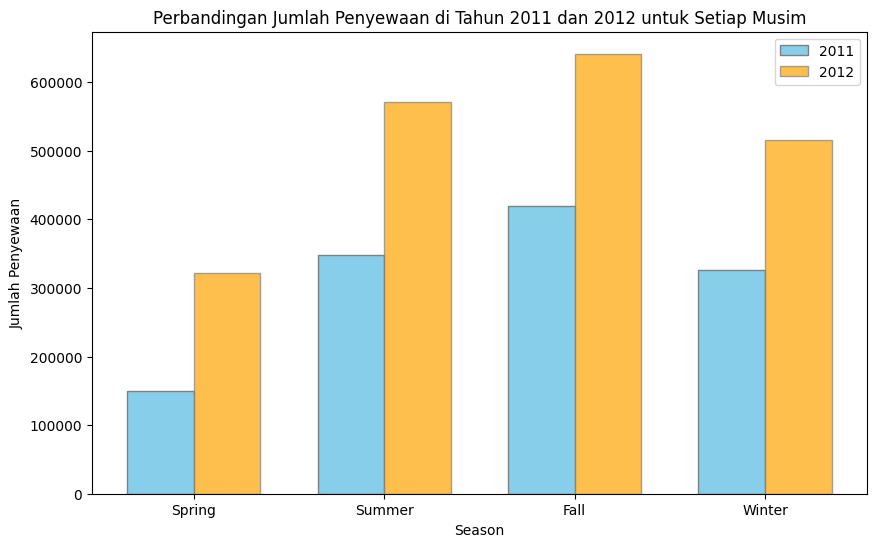

In [41]:
"""plt.figure(figsize=(8, 6))
plt.bar(result_season1['season'], result_season1['cnt'], color='skyblue')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.title('Jumlah Penyewaan di Tahun 2011 untuk Setiap Musim')
plt.xticks(result_season1['season'], ['Spring', 'Summer', 'Fall', 'Winter'])  # Mengganti label sumbu x dengan musim
plt.show()"""

# Menggabungkan kedua hasil perhitungan
merged_seasons = result_season1.merge(result_season2, on='season', suffixes=('_2011', '_2012'))
# Membuat posisi untuk setiap musim pada sumbu x
bar_width = 0.35  # Lebar setiap bar
r1 = np.arange(len(merged_seasons))  # Posisi untuk tahun 2011
r2 = [x + bar_width for x in r1]  # Posisi untuk tahun 2012

# Plotting
plt.figure(figsize=(10, 6))

# Grafik bar untuk tahun 2011
plt.bar(r1, merged_seasons['cnt_2011'], color='skyblue', width=bar_width, edgecolor='grey', label='2011')

# Grafik bar untuk tahun 2012
plt.bar(r2, merged_seasons['cnt_2012'], color='orange', width=bar_width, edgecolor='grey', alpha=0.7, label='2012')

plt.xlabel('Season')
plt.ylabel('Jumlah Penyewaan')
plt.title('Perbandingan Jumlah Penyewaan di Tahun 2011 dan 2012 untuk Setiap Musim')
plt.xticks([r + bar_width / 2 for r in range(len(merged_seasons))], ['Spring', 'Summer', 'Fall', 'Winter'])

plt.legend()
plt.show()

#####pada diagram diatas terlihat bahwa banyak penyewaan terjadi pada fall-season. terlihat juga peningkatan terjadi secara umum pada tahun berikutnya

### Pertanyaan 2: 

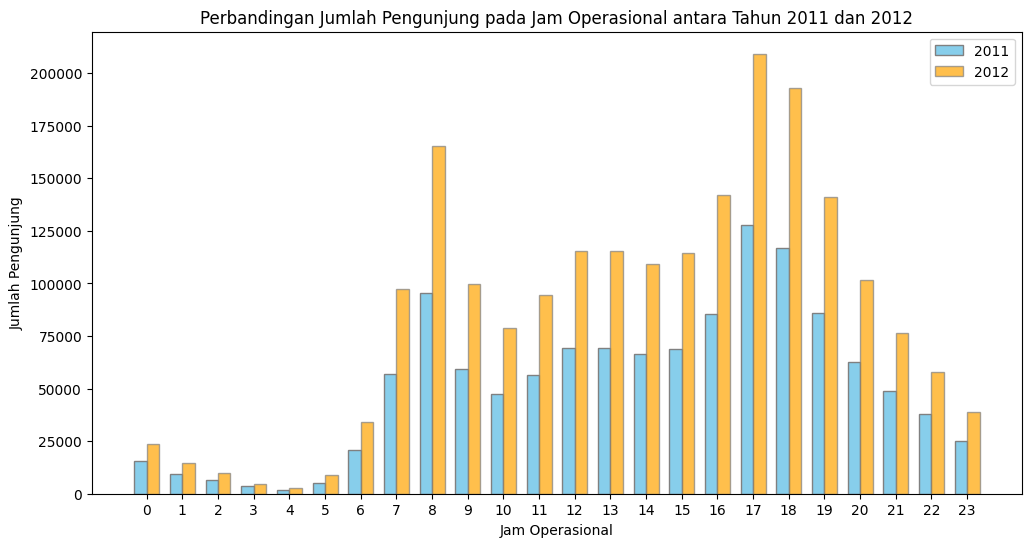

In [43]:
# Membuat posisi untuk setiap jam operasional pada sumbu x
bar_width = 0.35  # Lebar setiap bar
r1 = np.arange(len(result_hour1))  # Posisi untuk tahun 2011
r2 = [x + bar_width for x in r1]  # Posisi untuk tahun 2012

# Plotting
plt.figure(figsize=(12, 6))

# Grafik bar untuk tahun 2011
plt.bar(r1, result_hour1['cnt'], color='skyblue', width=bar_width, edgecolor='grey', label='2011')

# Grafik bar untuk tahun 2012
plt.bar(r2, result_hour2['cnt'], color='orange', width=bar_width, edgecolor='grey', alpha=0.7, label='2012')

plt.xlabel('Jam Operasional')
plt.ylabel('Jumlah Pengunjung')
plt.title('Perbandingan Jumlah Pengunjung pada Jam Operasional antara Tahun 2011 dan 2012')
plt.xticks([r + bar_width / 2 for r in range(len(result_hour1))], result_hour1['hr'])  # Memberikan label jam operasional pada sumbu x
plt.legend()
plt.show()


## Conclusion

- Conclution pertanyaan 1
pada diagram tersebut terlihat bahwa banyak penyewaan terjadi pada fall-season. terlihat juga peningkatan terjadi secara umum pada tahun berikutnya
- conclution pertanyaan 2
pada diagram ini terlihat umumnya penyewaan dilakukan mulai pukul 16.00 - 19.00, dan dilakukan dipagi hari pada pukul 08.00 pagi.
ternyata dapat dilihat pada dini hari masih saja ada yang menyewa sepeda.

In [45]:
#penyimpanan file
#hour_df.to_csv('hour_df.csv', index=False)
day_df.to_csv('day_df.csv', index=False)

